In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('xy_train.csv')

In [5]:
df.head()

,ID,text,label
0,0,Americans Aren't Sure If Flight 370 Vanished T...,1
1,1,Pope Leo X offering indulgences to sinners sho...,0
2,2,News: 5 Uplifting Hypotheticals Of What Could ...,0
3,3,George W. Bush and Jeb Bush at a campaign stop...,0
4,4,The WADA requesting their fair share from Lanc...,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48000 entries, 0 to 47999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      48000 non-null  int64 
 1   text    48000 non-null  object
 2   label   48000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [7]:
type(df.text[0])

str

In [8]:
df.text[0]

"Americans Aren't Sure If Flight 370 Vanished Thanks to Aliens, Terrorists, or Hide-and-Seek"

In [9]:
df.text[1]

'Pope Leo X offering indulgences to sinners shortly before the protestant reformation (Circa 1516).'

In [10]:
df.isnull().sum()

ID       0
text     0
label    0
dtype: int64

In [11]:
df.shape

(48000, 3)

In [12]:
df.query('label==2').shape

(187, 3)

In [13]:
df.query('label==1').shape

(22015, 3)

In [14]:
df.query('label==0').shape

(25798, 3)

In [15]:
temp = list(df.query('label==2').index)

In [16]:
df.drop(temp,axis=0,inplace=True)

In [17]:
df.query('label==2').shape

(0, 3)

In [18]:
from tensorflow.keras.layers import Embedding,Dense,LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

In [19]:
[1,2,3]

[1, 2, 3]

In [20]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
import re

In [22]:
df.head()

,ID,text,label
0,0,Americans Aren't Sure If Flight 370 Vanished T...,1
1,1,Pope Leo X offering indulgences to sinners sho...,0
2,2,News: 5 Uplifting Hypotheticals Of What Could ...,0
3,3,George W. Bush and Jeb Bush at a campaign stop...,0
4,4,The WADA requesting their fair share from Lanc...,0


In [23]:
X = df.drop('label',axis=1)

In [25]:
y = df['label']

In [27]:
X.shape,y.shape

((47813, 2), (47813,))

In [28]:
messages = X.text

In [30]:
messages[0]

"Americans Aren't Sure If Flight 370 Vanished Thanks to Aliens, Terrorists, or Hide-and-Seek"

In [31]:
stemmer = PorterStemmer()

In [35]:
corpus = []
for sent in messages:
    review = re.sub('[^a-zA-Z]',' ',sent)
    review = review.lower().split()

    review = [stemmer.stem(word) for word in review if not word in stopwords.words('english')]
    review = " ".join(review)
    corpus.append(review)

In [36]:
corpus

['american sure flight vanish thank alien terrorist hide seek',
 'pope leo x offer indulg sinner shortli protest reform circa',
 'news uplift hypothet could happen ban refuge use block actual go happen',
 'georg w bush jeb bush campaign stop father reelect springfield il',
 'wada request fair share lanc armstrong via sale live strong wristband',
 'way water bottl filler colleg engin build glitch broke',
 'made bio suppos parti box arm say projector caus projector caus projector overheat',
 'employe break room found guin book world record free carton cigarett',
 'henri kissing reveal plan scrub left wing sentiment chile recoloris',
 'inclus win spacex success launch handicap access ramp orbit',
 'psbattl putin holland merkel poroshenko peac talk ukrain februari',
 'spacex attempt send first dildo space end failur launch ask went wrong musk said like throw hotdog hallway underestim girth back draw board',
 'man geniu old camper renov pictur stori shamelessli lift imgur origin album link 

In [37]:
vocab_size = 5000

In [38]:
onehot_repr = [one_hot(sentences,vocab_size) for sentences in corpus]

In [40]:
onehot_repr[0]

[3271, 950, 4897, 272, 3354, 2615, 3393, 2455, 3576]

In [41]:
corpus[0]

'american sure flight vanish thank alien terrorist hide seek'

In [42]:
sent_length = 20

In [43]:
padded_repr = pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)

In [45]:
padded_repr[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       3271,  950, 4897,  272, 3354, 2615, 3393, 2455, 3576])

In [47]:
feature_size = 40

In [71]:
from tensorflow.keras.layers import Dropout

In [160]:
model = Sequential()
model.add(Embedding(vocab_size,feature_size,input_length=sent_length))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

C:\Users\tejas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [161]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [162]:
len(padded_repr),y.shape

(47813, (47813,))

In [163]:
X_final = np.array(padded_repr)
y_final = np.array(y)

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [165]:
X_train,X_test,y_train,y_test = train_test_split(X_final,y_final,test_size=0.2,random_state=42)

In [166]:
from tensorflow.keras.callbacks import EarlyStopping

In [167]:
early_stop = EarlyStopping(monitor='val_loss',patience=2,restore_best_weights=True)

In [168]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=32,callbacks=[early_stop])

Epoch 1/20
1196/1196 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.6705 - loss: 0.5767 - val_accuracy: 0.7519 - val_loss: 0.5134
Epoch 2/20
1196/1196 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - accuracy: 0.8024 - loss: 0.4242 - val_accuracy: 0.7641 - val_loss: 0.4900
Epoch 3/20
1196/1196 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accuracy: 0.8369 - loss: 0.3702 - val_accuracy: 0.7542 - val_loss: 0.5061
Epoch 4/20
1196/1196 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accuracy: 0.8592 - loss: 0.3289 - val_accuracy: 0.7544 - val_loss: 0.5300


In [169]:
y_preds = model.predict(X_test)

299/299 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [170]:
y_preds = np.where(y_preds > 0.5,1,0)

In [171]:
y_preds

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [172]:
accuracy_score(y_test,y_preds)

0.7640907664958695

In [173]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78      5179
           1       0.73      0.76      0.75      4384

    accuracy                           0.76      9563
   macro avg       0.76      0.76      0.76      9563
weighted avg       0.77      0.76      0.76      9563



In [175]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

<Axes: >

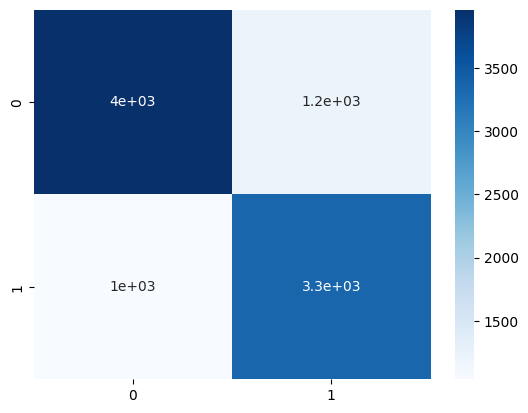

In [178]:
sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cmap='Blues')

In [203]:
test_df = pd.read_csv('x_test.csv')

In [204]:
test_df.head()

,ID,text
0,0,Local soccer club ditch shirt sponsorship deal...
1,1,What is this weird metal thing in the mail fro...
2,2,Donald Trump Jr reportedly told in email of Ru...
3,3,Satanist prayer is held in Alaskan government ...
4,4,There's A Spectacular Error In The Background ...


In [222]:
test_df = test_df.iloc[:11955].copy()

In [230]:
len(test_df)

11955

In [223]:
def preprocess_text(text, vocab_size, sent_length):
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if word not in stopwords.words('english')]
    review = " ".join(review)
    
    onehot_encoded = one_hot(review, vocab_size)
    padded = pad_sequences([onehot_encoded], maxlen=sent_length, padding='pre')
    return padded[0]

In [224]:
X_test_processed = np.array([preprocess_text(text, vocab_size, sent_length) for text in test_df['text']])

In [233]:
y_preds = model.predict(X_test_processed)
y_preds_labels = np.where(y_preds > 0.5,1,0).flatten()

374/374 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


In [249]:
submission = pd.DataFrame({
    'ID': test_df['ID'].values,
    'labels': y_preds_labels
})

In [252]:
len(submission)

11955

In [253]:
len(test_df)

11955

In [258]:
submission.head()

,ID,labels
0,0,1
1,1,0
2,2,1
3,3,1
4,4,0


In [259]:
submission.to_csv("submission.csv", index=False)